<a href="https://colab.research.google.com/github/Sayana-mc/Data-Analysis-internship/blob/main/Intership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 1-Task 1

In [ ]:
import pandas as pd
from collections import Counter
df=pd.read_csv("/Dataset .csv")
cuisine_series = df['Cuisines'].dropna()
cuisine_list=[]
for entry in cuisine_series:
  cuisines=[c.strip() for c in entry.split(',')]
  cuisine_list.extend(cuisines)
cuisine_counts=Counter(cuisine_list)
top_3 =cuisine_counts.most_common(3)
total_restaurants=len(cuisine_series)
Top_3_cuisine=[(cuisines,count,round((count/total_restaurants)*100,2))
  for cuisines,count in top_3]
print("Top 3 common cuisines and their counts:")
for cuisines,count,percentage in Top_3_cuisine:
    print(f"{cuisines}:{count} retaurants ({percentage}%)")

Top 3 common cuisines and their counts:
North Indian:3960 retaurants (41.5%)
Chinese:2735 retaurants (28.66%)
Fast Food:1986 retaurants (20.81%)


# Level 1-Task 2

City with the highest number of restaurants:New Delhi
Number of restaurants in New Delhi:5473
City with the highest average rating:Gurgaon
Average rating in Gurgaon:2.65


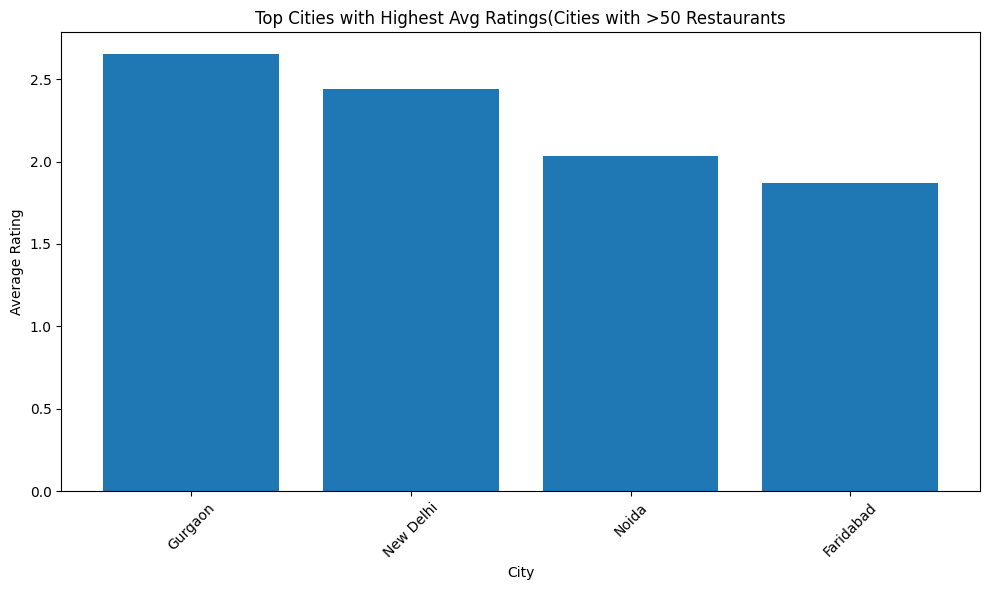

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/Dataset .csv")
city_counts=df['City'].value_counts()
top_city_by_restaurants=city_counts.idxmax()
num_restaurants=city_counts.max()
print(f"City with the highest number of restaurants:{top_city_by_restaurants}")
print(f"Number of restaurants in {top_city_by_restaurants}:{num_restaurants}")
df['Agg rating']=pd.to_numeric(df['Aggregate rating'],errors='coerce')
valid_cities=city_counts[city_counts>50].index
filtered_df=df[df['City'].isin(valid_cities)]
filtered_avg_rating=filtered_df.groupby('City')['Agg rating'].mean().dropna().sort_values(ascending=False)
top_city_by_rating=filtered_avg_rating.idxmax()
avg_rating=round(filtered_avg_rating.max(),2)
print(f"City with the highest average rating:{top_city_by_rating}")
print(f"Average rating in {top_city_by_rating}:{avg_rating}")
plt.figure(figsize=(10,6))
plt.bar(filtered_avg_rating.index,filtered_avg_rating.values)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Top Cities with Highest Avg Ratings(Cities with >50 Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Level 1- Task 3

Unique price range: [3 4 2 1]

 percentage of resturant in each prioce range:
1 restaurants:46.53%
2 restaurants:32.59%
3 restaurants:14.74%
4 restaurants:6.14%


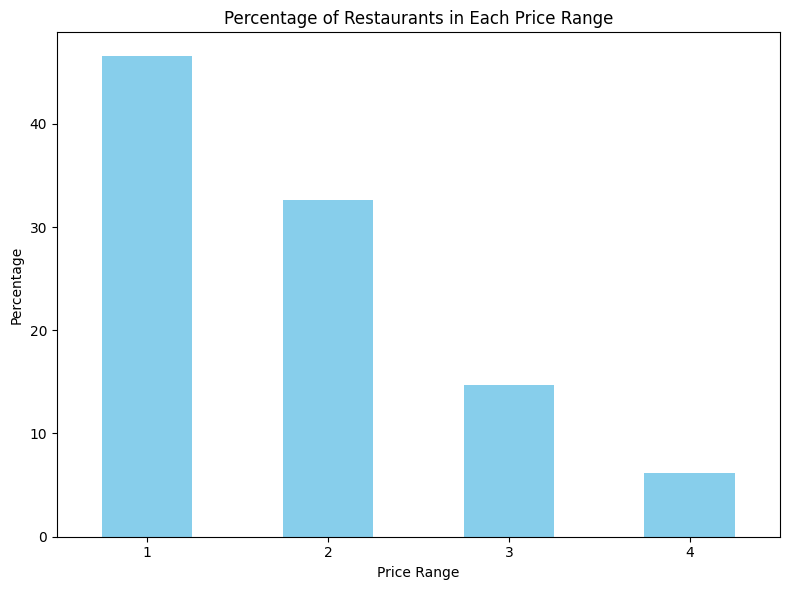

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Dataset .csv")
print("Unique price range:",df['Price range'].unique())
price_counts=df['Price range'].value_counts().sort_index()
total_restaurants=len(df)
price_percentage=(price_counts/total_restaurants)*100
print("\n percentage of resturant in each prioce range:")
for price,percent in price_percentage.items():
  print(f"{price} restaurants:{percent:.2f}%")
plt.figure(figsize=(8,6))
price_percentage.plot(kind='bar',color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.title('Percentage of Restaurants in Each Price Range')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Level 1 -Task 4

Online delivery:25.66%
Average rating for restaurants with online delivery:3.25
Average rating for restaurants without online delivery:2.47


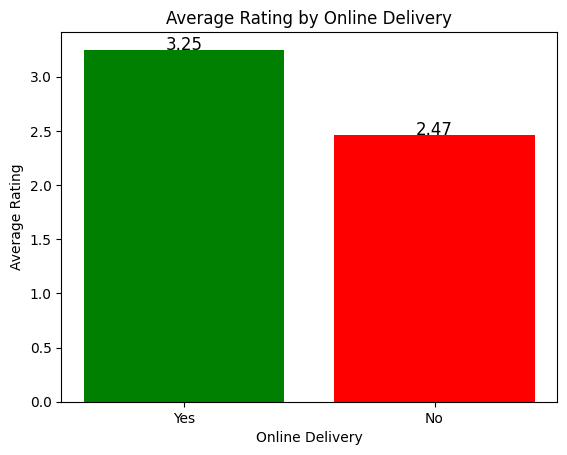

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Dataset .csv")
df=df.dropna(subset=['Has Online delivery','Aggregate rating'])
online_percent=(df['Has Online delivery']=='Yes').mean()*100
print(f"Online delivery:{online_percent:.2f}%")
avg_yes=df[df['Has Online delivery']== 'Yes']['Aggregate rating'].mean()
avg_no=df[df['Has Online delivery']== 'No']['Aggregate rating'].mean()
print(f"Average rating for restaurants with online delivery:{avg_yes:.2f}")
print(f"Average rating for restaurants without online delivery:{avg_no:.2f}")
plt.bar(['Yes','No'],[avg_yes,avg_no],color=['green','red'])
for i,val in enumerate([avg_yes,avg_no]):
  plt.text(i,val,f'{val:.2f}',ha='center',fontsize=12)
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.title('Average Rating by Online Delivery')
plt.show()

# Level 2- Task 1

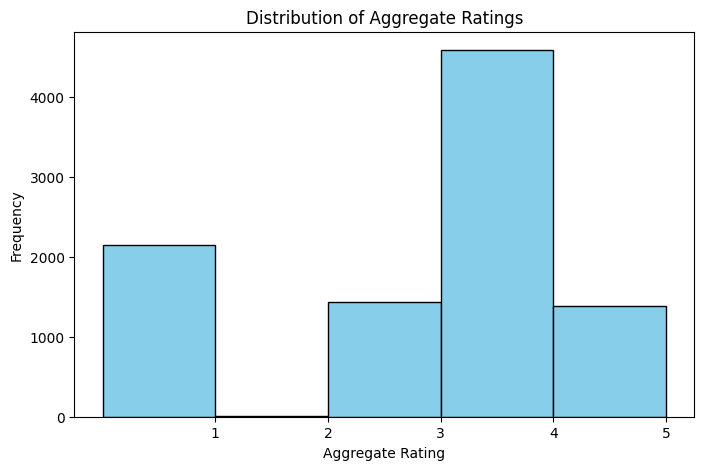

Most common rating bin:(3, 4]
Average votes in each rating bin:
Aggregate rating
(0, 1]           NaN
(1, 2]    144.200000
(2, 3]     38.991010
(3, 4]    162.152005
(4, 5]    637.413824
Name: Votes, dtype: float64


<ipython-input-10-ea3207668caa>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_votes_bin=df.groupby(rating_bins)['Votes'].mean()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Dataset .csv")
df=df.dropna(subset=['Votes','Aggregate rating'])
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
plt.figure(figsize=(8,5))
plt.hist(df['Aggregate rating'],bins=[0,1,2,3,4,5],color='skyblue',edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.xticks([1,2,3,4,5])
plt.show()
rating_bins=pd.cut(df['Aggregate rating'],bins=[0,1,2,3,4,5])
most_common_bin=rating_bins.value_counts().idxmax()
print(f"Most common rating bin:{most_common_bin}")
average_votes_bin=df.groupby(rating_bins)['Votes'].mean()
print("Average votes in each rating bin:")
print(average_votes_bin)

# Level 2-Task 2

Most common cusine combination:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Average rating for each cuisine:
 Cuisines
European, German                                                       4.9
Continental, Indian                                                    4.9
American, Coffee and Tea                                               4.9
American, BBQ, Sandwich                                                4.9
Mexican, American, Healthy Food                                        4.9
                                                                      ... 
European, North Indian, Chinese                           

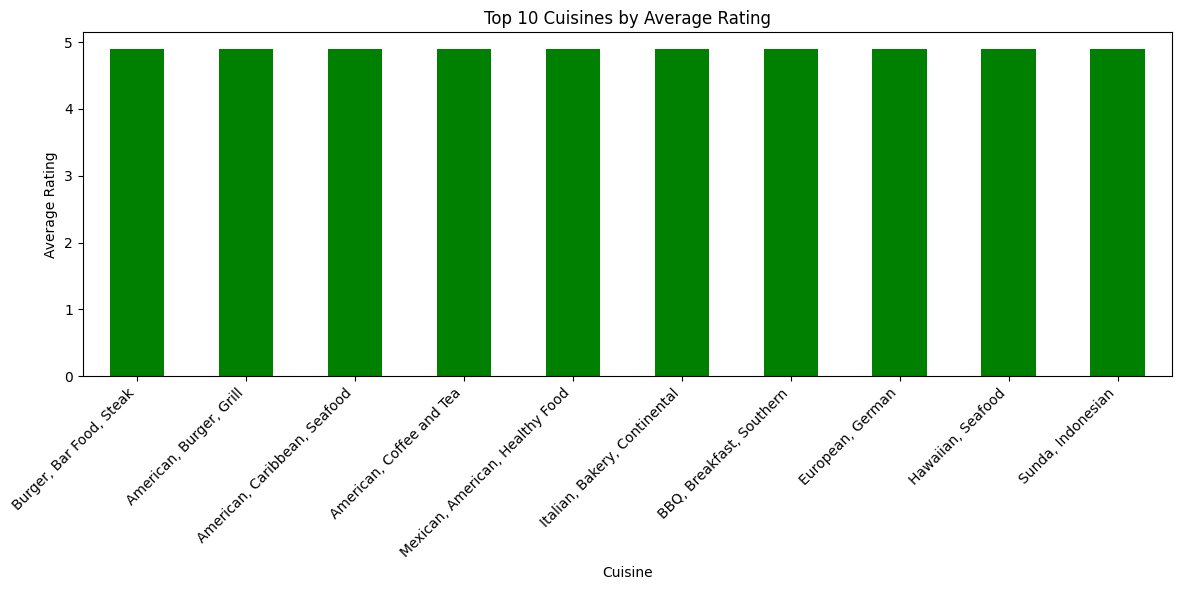

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Dataset .csv")
common_cuisines=df['Cuisines'].value_counts().head(10)
print("Most common cusine combination:\n",common_cuisines)
df_filtered=df[df['Aggregate rating']>0]
avg_rating_by_cuisine=df_filtered.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage rating for each cuisine:\n",avg_rating_by_cuisine)
plt.figure(figsize=(12,6))
cuisine_rating.head(10).plot(kind='bar',color='green')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top 10 Cuisines by Average Rating')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# Level 2 -Task 3

In [ ]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
import numpy as np
df=pd.read_csv("/content/Dataset .csv")
df=df.dropna(subset=['Latitude','Longitude'])
df['Latitude']=pd.to_numeric(df['Latitude'],errors='coerce')
df['Longitude']=pd.to_numeric(df['Longitude'],errors='coerce')
coords=df[['Latitude','Longitude']].values
coords_rad=np.radians(coords)
db=DBSCAN(eps=0.01,min_samples=2,algorithm='ball_tree',metric='haversine')
db.fit(coords_rad)
df['Cluster']=db.labels_
map_center=[df['Latitude'].mean(),df['Longitude'].mean()]
map=folium.Map(location=map_center,zoom_start=13)
cluster_colors=['red','green','blue','purple','orange','yellow','darkred','lightred','beige','darkgreen','darkblue']
for idx,row in df.iterrows():
  cluster_id=row['Cluster']
  color='gray' if cluster_id==-1 else cluster_colors[cluster_id%len(cluster_colors)]
  folium.Marker([row['Latitude'],row['Longitude']],
                popup=f"{row['Restaurant Name']}(Cluster{cluster_id})",
                icon=folium.Icon(color=color,icon='cutlery',prefix='fa')).add_to(map)
map

# Level 2 - Task 4

Number of restaurant chains: 734

Top 10 Restaurant Chains by Number of Outlets:

                  Aggregate rating  Votes  Number of Outlets
Restaurant Name                                             
Cafe Coffee Day               2.42   2428                 83
Domino's Pizza                2.74   6643                 79
Subway                        2.91   6124                 63
Green Chick Chop              2.67    964                 51
McDonald's                    3.34   5291                 48
Keventers                     2.87   1263                 34
Pizza Hut                     3.32   4961                 30
Giani                         2.69    854                 29
Baskin Robbins                1.86    428                 28
Barbeque Nation               4.35  28142                 26


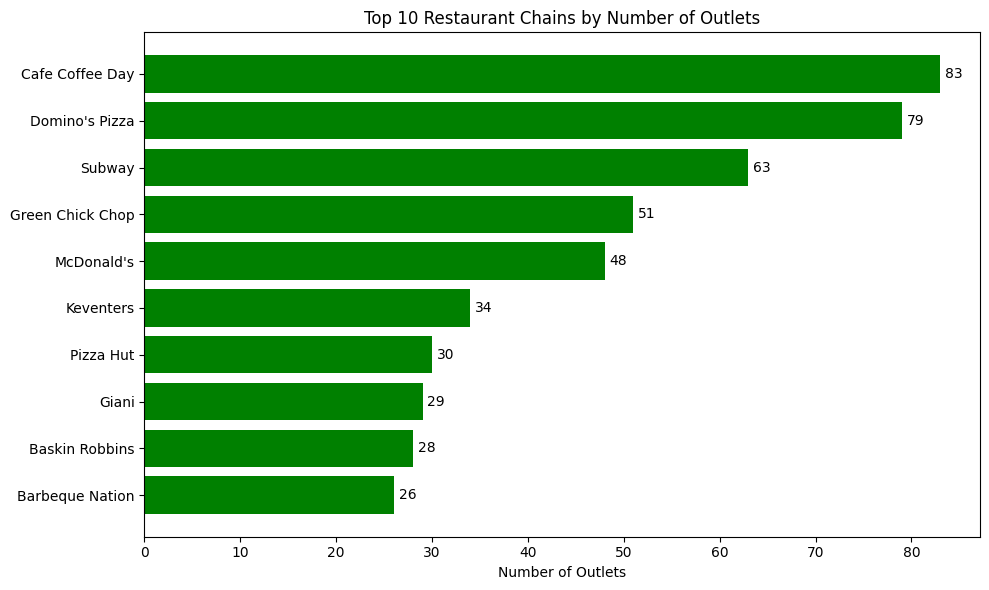

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Dataset .csv")
restaurant_name_counts = df["Restaurant Name"].value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1]
num_chains = len(chains)
print(f"Number of restaurant chains: {num_chains}")
chain_restaurants_df = df[df["Restaurant Name"].isin(chains.index)]
chain_analysis = chain_restaurants_df.groupby("Restaurant Name").agg({
    "Aggregate rating": "mean",
    "Votes": "sum",
    "Restaurant ID": "count"
}).rename(columns={"Restaurant ID": "Number of Outlets"})
chain_analysis_sorted = chain_analysis.sort_values(by="Number of Outlets", ascending=False)
top_10_chains = chain_analysis_sorted.head(10).round(2)
print("\nTop 10 Restaurant Chains by Number of Outlets:\n")
print(top_10_chains)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_chains.index[::-1], top_10_chains["Number of Outlets"][::-1], color='green')
plt.xlabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center')

plt.tight_layout()
plt.show()

## Level 3 -Task 1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 most common words in reviews:
        word  freq
0    average  3737
2       good  3179
4      rated  2148
1  excellent   301
3       poor   186


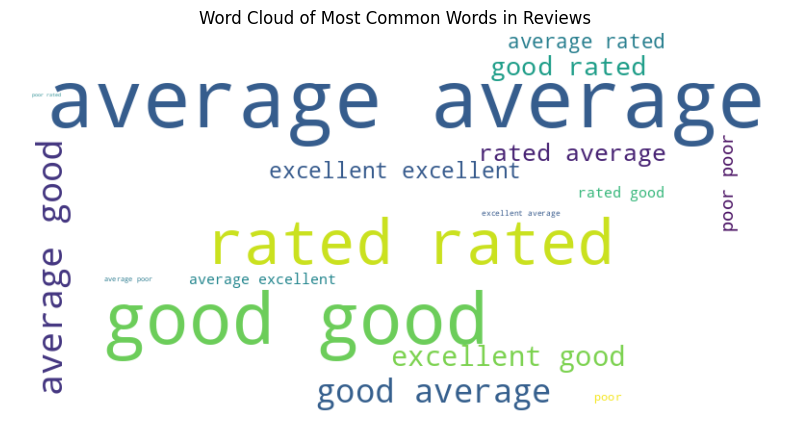

Average length of reviews:1.34


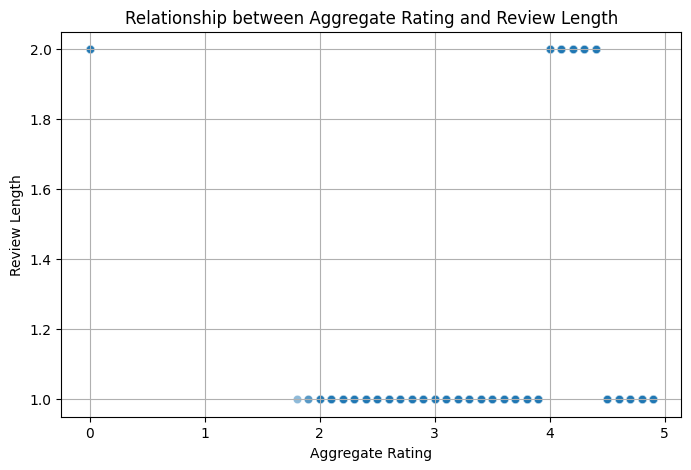

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
df=pd.read_csv("/content/Dataset .csv")
df_reviews=df.dropna(subset=['Rating text'])
df_reviews['Cleaned_Reviews']=df_reviews['Rating text'].str.lower()
df_reviews['Cleaned_Reviews']=df_reviews['Cleaned_Reviews'].apply(lambda x: ''.join([word for word in x.split() if word not in stop_words]))
vectorizer=CountVectorizer()
word_matrix=vectorizer.fit_transform(df_reviews['Cleaned_Reviews'])
words = vectorizer.get_feature_names_out()
word_freq=word_matrix.sum(axis=0)
freq_df=pd.DataFrame({'word':words,'freq':word_freq.A1})
freq_df=freq_df.sort_values(by='freq',ascending=False)
print("Top 10 most common words in reviews:")
print(freq_df.head(10))
all_words = ' '.join(df_reviews['Cleaned_Reviews'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Reviews')
plt.show()
df_reviews['Review_Length']=df_reviews['Rating text'].apply(lambda x:len(x.split()))
avg_length=df_reviews['Review_Length'].mean()
print(f"Average length of reviews:{avg_length:.2f}")
plt.figure(figsize=(8,5))
sns.scatterplot(x='Aggregate rating',y='Review_Length',data=df_reviews,alpha=0.5)
plt.xlabel('Aggregate Rating')
plt.ylabel('Review Length')
plt.title('Relationship between Aggregate Rating and Review Length')
plt.grid(True)
plt.show()

# Level 3 - Task 2

Top 5 Restaurants with Highest Votes:
                 Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6

 Top 5 Restaurants with Lowest Non-Zero Votes:
              Restaurant Name  Votes  Aggregate rating
58     Quiosque Chopp Brahma      1               0.0
4362  Amul Ice-Cream Parlour      1               0.0
8527       Shri Adarsh Kulfi      1               0.0
8528            Simla Bakery      1               0.0
7802              Cafe Youth      1               0.0
Correlation between Aggregate Rating and Votes:0.31


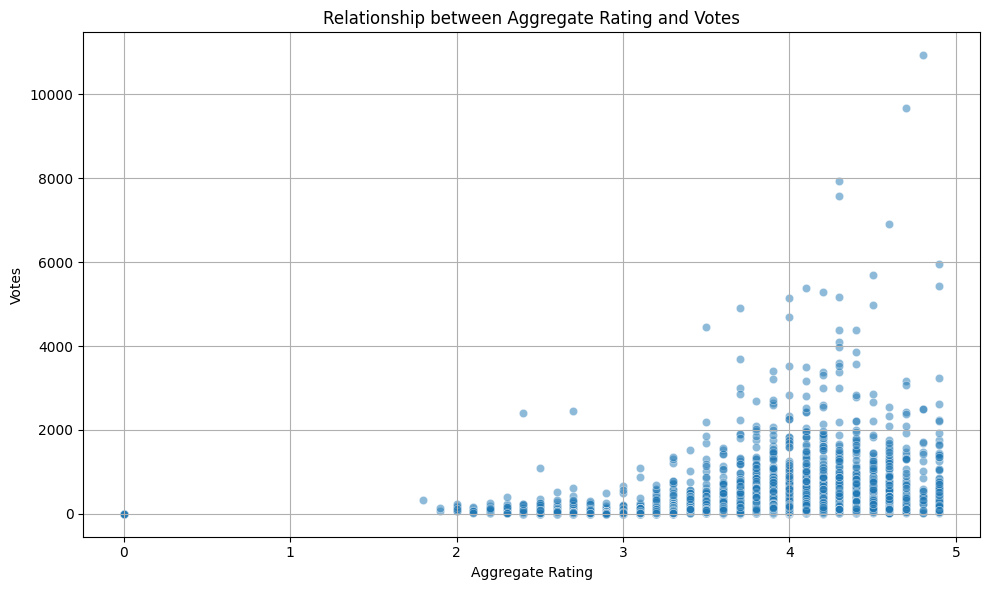

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Dataset .csv")
df=df.dropna(subset=['Votes','Aggregate rating'])
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
top_voted = df.sort_values(by='Votes', ascending=False).head(5)
print("Top 5 Restaurants with Highest Votes:\n", top_voted[['Restaurant Name', 'Votes', 'Aggregate rating']])
low_voted = df[df['Votes'] > 0].sort_values(by='Votes').head(5)
print("\n Top 5 Restaurants with Lowest Non-Zero Votes:\n", low_voted[['Restaurant Name', 'Votes', 'Aggregate rating']])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, alpha=0.5)
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.title('Relationship between Aggregate Rating and Votes')
plt.grid(True)
plt.tight_layout()
plt.show
correlation=df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between Aggregate Rating and Votes:{correlation:.2f}")